In [1]:
import pandas as pd
import html
import re 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import numpy as np
from textblob import TextBlob
import datetime as dt
from wordcloud import WordCloud

In [2]:
df = pd.read_csv(r'C:\Users\sowmy\Desktop\Technocolabs\Datasets\TwitterData\PayPal.csv')
df

,Datetime,Text
0,2021-09-21 23:38:02+00:00,@JerryCap Why is $PYPL so slow at rolling out ...
1,2021-09-21 23:37:44+00:00,"Long Watches: $PYPL, $FB, $QS, $NVDA, $AAPL! S..."
2,2021-09-21 23:36:25+00:00,I recorded it for those who haven't seen it.\n...
3,2021-09-21 23:33:51+00:00,Finfluencer Sean D. Emory (18.8k follower) mos...
4,2021-09-21 23:24:59+00:00,Anyone have thoughts on the terrible $PYPL pri...
...,...,...
10057,2021-08-04 20:22:53+00:00,$BTC $ETH $LINK $XTZ $ADA $VET $KNC $SXP $TWTR...
10058,2021-08-04 20:22:20+00:00,@STXRBOY999 Let’s hope PYPL holds during AH! M...
10059,2021-08-04 20:17:44+00:00,@STXRBOY999 PT for pypl tomorrow?
10060,2021-08-04 20:16:28+00:00,$ETSY getting slammed on earnings. May affect ...


In [3]:
PAYPAL_clean = df.drop_duplicates('Text',keep='first') #delete the duplicates by dropping them and store the result value to a new variable
PAYPAL_clean.Text = PAYPAL_clean.Text.str.lower() #convert text to lower case
PAYPAL_clean.Text = PAYPAL_clean.Text.apply(lambda x: re.split('https:\/\/.*', str(x))[0])  #remove urls
PAYPAL_clean.Text = PAYPAL_clean.Text.apply(lambda x: re.sub(r'@\w+', '', str(x)))   #remove mentions
PAYPAL_clean.Text = PAYPAL_clean.Text.apply(lambda x: re.sub(r'&[a-z]+;', '', str(x))) #remove html characters
PAYPAL_clean.Text = PAYPAL_clean.Text.apply(lambda x: re.sub(r'[^\w\s]', '', str(x)))

def getSubjectivity(PAYPAL_clean):
    return TextBlob(PAYPAL_clean).sentiment.subjectivity

def getPolarity(PAYPAL_clean):
    return TextBlob(PAYPAL_clean).sentiment.polarity


def getTextAnalysis(a):
    if a<0:
        return "Negative"
    elif a==0:
        return "Neutral"
    else:
        return "Positive"    

PAYPAL_clean['Subjectivity'] = PAYPAL_clean['Text'].apply(getSubjectivity)
PAYPAL_clean['Polarity'] = PAYPAL_clean['Text'].apply(getPolarity)
PAYPAL_clean["Score"] = PAYPAL_clean['Polarity'].apply(getTextAnalysis)
PAYPAL_clean

D:\Anaconda\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-3-ac356541af6e>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PAYPAL_clean['Subjectivity'] = PAYPAL_clean['Text'].apply(getSubjectivity)
<ipython-input-3-ac356541af6e>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,Datetime,Text,Subjectivity,Polarity,Score
0,2021-09-21 23:38:02+00:00,why is pypl so slow at rolling out features f...,0.400000,-0.300000,Negative
1,2021-09-21 23:37:44+00:00,long watches pypl fb qs nvda aapl short watche...,0.350000,-0.025000,Negative
2,2021-09-21 23:36:25+00:00,i recorded it for those who havent seen it\nqy...,0.500000,0.166667,Positive
3,2021-09-21 23:33:51+00:00,finfluencer sean d emory 188k follower most me...,0.166667,0.166667,Positive
4,2021-09-21 23:24:59+00:00,anyone have thoughts on the terrible pypl pric...,0.466667,-0.300000,Negative
...,...,...,...,...,...
10057,2021-08-04 20:22:53+00:00,btc eth link xtz ada vet knc sxp twtr es jd ba...,0.200000,0.200000,Positive
10058,2021-08-04 20:22:20+00:00,lets hope pypl holds during ah most likely ta...,0.533333,0.166667,Positive
10059,2021-08-04 20:17:44+00:00,pt for pypl tomorrow,0.000000,0.000000,Neutral
10060,2021-08-04 20:16:28+00:00,etsy getting slammed on earnings may affect eb...,0.580000,0.046667,Positive


In [19]:
PAYPAL_clean.Polarity

0       -0.300000
1       -0.025000
2        0.166667
3        0.166667
4       -0.300000
           ...   
10057    0.200000
10058    0.166667
10059    0.000000
10060    0.046667
10061    0.600000
Name: Polarity, Length: 9804, dtype: float64

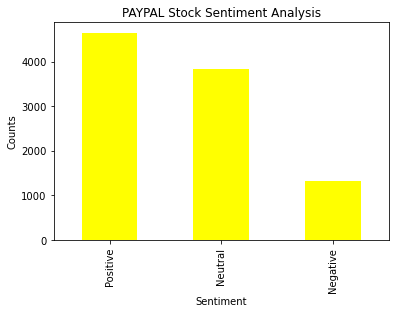

In [8]:
PAYPAL_clean['Score'].value_counts()

plt.title('PAYPAL Stock Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
PAYPAL_clean['Score'].value_counts().plot(kind = 'bar', color='yellow')
plt.show()

<ipython-input-7-d409b7a2a604>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  PAYPAL_clean.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],


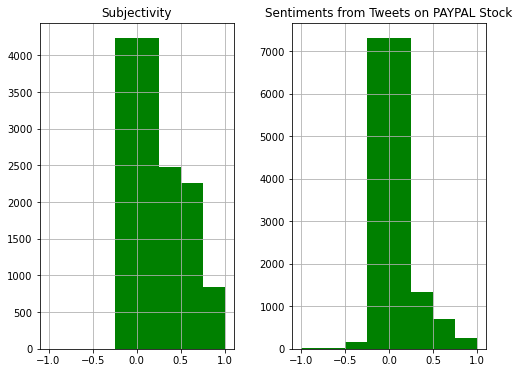

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
PAYPAL_clean.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="green")

plt.title("Sentiments from Tweets on PAYPAL Stock")
plt.show()

In [4]:
segment = pd.get_dummies(PAYPAL_clean['Score'])
segment

,Negative,Neutral,Positive
0,1,0,0
1,1,0,0
2,0,0,1
3,0,0,1
4,1,0,0
...,...,...,...
10057,0,0,1
10058,0,0,1
10059,0,1,0
10060,0,0,1


In [21]:
joined_df = pd.concat([PAYPAL_clean, segment], axis = 1)
joined_df['Datetime'] = pd.to_datetime(joined_df.Datetime, errors='coerce',format='%Y/%m/%d %H:%M:%S.%f')

datetime_list = joined_df["Datetime"].tolist()
df1 = joined_df.groupby([joined_df['Datetime'].dt.date]).sum()
df1

,Subjectivity,Polarity,Negative,Neutral,Positive
Datetime,,,,,
2021-08-04,26.125994,7.383566,12.0,27.0,29.0
2021-08-05,118.357955,42.201297,46.0,189.0,151.0
2021-08-06,66.260068,17.815687,37.0,79.0,88.0
2021-08-07,28.911181,9.470471,11.0,33.0,44.0
2021-08-08,31.917114,14.838643,8.0,27.0,56.0
2021-08-09,45.585411,20.079447,10.0,65.0,69.0
2021-08-10,56.887924,16.808915,26.0,101.0,84.0
2021-08-11,43.819817,12.234847,27.0,69.0,60.0
2021-08-12,47.245781,13.619687,24.0,74.0,58.0


In [17]:
df2 = df1#.drop(['Subjectivity','Polarity'],axis=1)
df2.reset_index(inplace=True)
df2.head()

,Datetime,Subjectivity,Polarity,Negative,Neutral,Positive
0,2021-08-04,26.125994,7.383566,12.0,27.0,29.0
1,2021-08-05,118.357955,42.201297,46.0,189.0,151.0
2,2021-08-06,66.260068,17.815687,37.0,79.0,88.0
3,2021-08-07,28.911181,9.470471,11.0,33.0,44.0
4,2021-08-08,31.917114,14.838643,8.0,27.0,56.0


In [8]:
col_list = list(df2)
col_list.remove('Datetime')
df2['Total_Tweets'] = df2[col_list].sum(axis=1)
df2['Datetime']=pd.to_datetime(df2.Datetime, format='%Y/%m/%d %H:%M:%S.%f')
df2['Year'] = df2['Datetime'].dt.year
df2['Month'] = df2['Datetime'].dt.month
df2['Day'] = df2['Datetime'].dt.day
df2.head()

,Datetime,Subjectivity,Polarity,Negative,Neutral,Positive,Total_Tweets,Year,Month,Day
0,2021-08-04,26.125994,7.383566,12.0,27.0,29.0,101.509560,2021,8,4
1,2021-08-05,118.357955,42.201297,46.0,189.0,151.0,546.559252,2021,8,5
2,2021-08-06,66.260068,17.815687,37.0,79.0,88.0,288.075755,2021,8,6
3,2021-08-07,28.911181,9.470471,11.0,33.0,44.0,126.381653,2021,8,7
4,2021-08-08,31.917114,14.838643,8.0,27.0,56.0,137.755757,2021,8,8


In [9]:
df2.to_csv('EDA_Paypal.csv', index=False)

In [9]:
df_3 = pd.read_csv('C:/Users/sowmy/Desktop/Technocolabs/Datasets/FinancialData/PayPal.csv')

In [10]:
df_3['Date'] = pd.to_datetime(df_3['Date']).apply(lambda x: x.strftime('%Y-%m-%d')if not pd.isnull(x) else '')
df2.rename(columns = {'Datetime':'Date'}, inplace = True)

In [11]:
df_3['Date'] = pd.to_datetime(df_3.Date, errors='coerce',format='%Y/%m/%d')
df_3.rename(columns = {'Close/Last':'Close'}, inplace = True)
df_3

,Date,Close,Volume,Open,High,Low
0,2021-09-21,$269.49,4326076.0,$271.75,$272.2986,$267.8
1,2021-09-20,$269.91,7728307.0,$271.55,$273,$265.68
2,2021-09-17,$276.34,8117226.0,$282.18,$282.5,$275.92
3,2021-09-16,$282.97,3606742.0,$281.04,$283.69,$280.39
4,2021-09-15,$282.43,4056783.0,$284.21,$285.75,$279.5
...,...,...,...,...,...,...
1246,NaT,NaN,NaN,NaN,NaN,NaN
1247,NaT,NaN,NaN,NaN,NaN,NaN
1248,NaT,NaN,NaN,NaN,NaN,NaN
1249,NaT,NaN,NaN,NaN,NaN,NaN


In [12]:
# Merge the two dataframes, using _ID column as key
merge_left = pd.merge(df2, df_3, on = 'Date', how='left')
merge_left.set_index('Date', inplace = True)
# Write it to a new CSV file
#df3.to_csv('CSV3.csv')

In [13]:
merge_left.reset_index(inplace=True)
merge_left['Close'] = merge_left['Close'].astype(str).map(lambda x: x.lstrip('$'))
merge_left['Open'] = merge_left['Open'].astype(str).map(lambda x: x.lstrip('$'))
merge_left['Low'] = merge_left['Low'].astype(str).map(lambda x: x.lstrip('$'))
merge_left['High'] = merge_left['High'].astype(str).map(lambda x: x.lstrip('$'))
merge_left['dayOfWeek'] = merge_left['Date'].dt.day_name()

In [15]:
merge_2 = merge_left.sort_index(ascending=True)

#Add stock name column = PAYPAL 
merge_2['Stock name']= 'PAYPAL'
colum_names = ['Stock name','Date','Year','Month','Day','dayOfWeek','Close','Open','High','Low','Volume','Polarity','Subjectivity','Positive','Negative','Neutral','Total_Tweets']
merge_3 = merge_2.reindex(columns=colum_names)
merge_3['Close'] = merge_3['Close'].astype(float)
merge_3['Open'] = merge_3['Open'].astype(float)
merge_3['High'] = merge_3['High'].astype(float)
merge_3['Low'] = merge_3['Low'].astype(float)
merge_4 = merge_3.interpolate(method = 'linear', limit_direction='backward')
merge_4

,Stock name,Date,Year,Month,Day,dayOfWeek,Close,Open,High,Low,Volume,Polarity,Subjectivity,Positive,Negative,Neutral,Total_Tweets
0,PAYPAL,2021-08-04,2021,8,4,Wednesday,275.500000,274.071100,276.093100,270.670000,6.616877e+06,7.383566,26.125994,29.0,12.0,27.0,101.509560
1,PAYPAL,2021-08-05,2021,8,5,Thursday,280.670000,277.100000,280.960000,275.820000,7.354195e+06,42.201297,118.357955,151.0,46.0,189.0,546.559252
2,PAYPAL,2021-08-06,2021,8,6,Friday,279.540000,280.000000,282.369900,276.870000,6.086327e+06,17.815687,66.260068,88.0,37.0,79.0,288.075755
3,PAYPAL,2021-08-07,2021,8,7,Saturday,279.076667,280.073333,281.946600,277.066667,5.331883e+06,9.470471,28.911181,44.0,11.0,33.0,126.381653
4,PAYPAL,2021-08-08,2021,8,8,Sunday,278.613333,280.146667,281.523300,277.263333,4.577440e+06,14.838643,31.917114,56.0,8.0,27.0,137.755757
5,PAYPAL,2021-08-09,2021,8,9,Monday,278.150000,280.220000,281.100000,277.460000,3.822996e+06,20.079447,45.585411,69.0,10.0,65.0,209.664859
6,PAYPAL,2021-08-10,2021,8,10,Tuesday,274.370000,278.940000,280.490000,272.500000,6.264118e+06,16.808915,56.887924,84.0,26.0,101.0,284.696839
7,PAYPAL,2021-08-11,2021,8,11,Wednesday,276.410000,277.442000,278.235000,273.130000,5.785928e+06,12.234847,43.819817,60.0,27.0,69.0,212.054665
8,PAYPAL,2021-08-12,2021,8,12,Thursday,274.590000,274.250000,276.805000,273.060000,4.513787e+06,13.619687,47.245781,58.0,24.0,74.0,216.865467
9,PAYPAL,2021-08-13,2021,8,13,Friday,274.910000,276.170000,276.810000,274.610000,4.097209e+06,22.357456,56.160169,80.0,21.0,61.0,240.517625


In [22]:
merge_4.to_csv('PAYPAL_combined_POL.csv')

In [23]:
merge_4.dtypes

Stock name              object
Date            datetime64[ns]
Year                     int64
Month                    int64
Day                      int64
dayOfWeek               object
Close                  float64
Open                   float64
High                   float64
Low                    float64
Volume                 float64
Polarity               float64
Subjectivity           float64
Positive               float64
Negative               float64
Neutral                float64
Total_Tweets           float64
dtype: object